In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple chart

In [391]:
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x) + 1.

(0, 2)

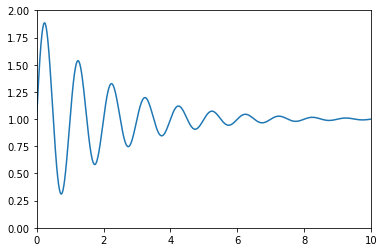

In [392]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(0, 2)

# Convert user data into display coordinate system

(0, 1) and (10, 1) are two points of our dataset. In display coordinate system (0, 0) is the bottom left. In this case the 0 Y axis is at 144.72 pixels, 0 x axis at 54. pixels and 10 x axis at 388.8:

In [393]:
ax.transData.transform([(0, 1), (10, 1)])

array([[ 54.  , 144.72],
       [388.8 , 144.72]])

Let's try to display text specifying axes coordinate system:

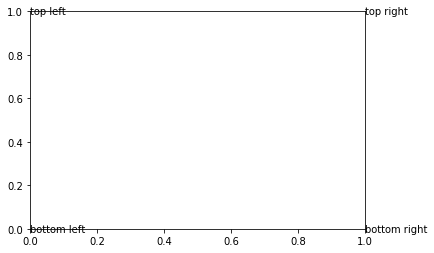

In [394]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.text(0., 0., r"bottom left", transform=ax.transAxes, horizontalalignment='left', verticalalignment='center');
ax.text(1., 0., r"bottom right", transform=ax.transAxes, horizontalalignment='left', verticalalignment='center');
ax.text(1., 1., r"top right", transform=ax.transAxes, horizontalalignment='left', verticalalignment='center');
ax.text(0., 1., r"top left", transform=ax.transAxes, horizontalalignment='left', verticalalignment='center');

Let's try to display text specifying figure coordinate system:

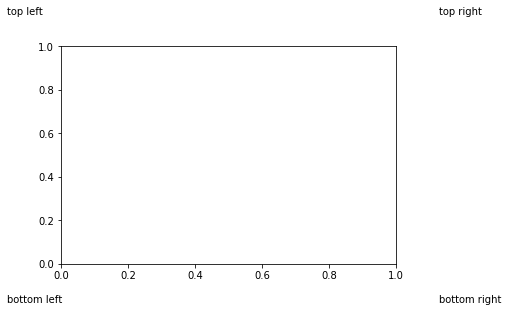

In [395]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.text(0., 0., r"bottom left", transform=fig.transFigure, horizontalalignment='left', verticalalignment='center');
ax.text(1., 0., r"bottom right", transform=fig.transFigure, horizontalalignment='left', verticalalignment='center');
ax.text(1., 1., r"top right", transform=fig.transFigure, horizontalalignment='left', verticalalignment='center');
ax.text(0., 1., r"top left", transform=fig.transFigure, horizontalalignment='left', verticalalignment='center');

Let's try to display in data coordinates system:

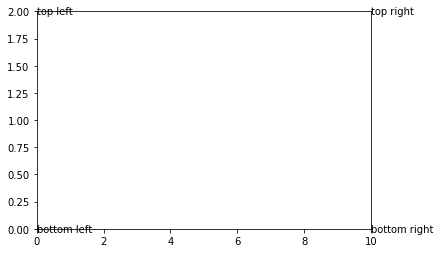

In [396]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0., 10.)
ax.set_ylim(0., 2.)
ax.text(0., 0., r"bottom left", transform=ax.transData, horizontalalignment='left', verticalalignment='center');
ax.text(10., 0., r"bottom right", transform=ax.transData, horizontalalignment='left', verticalalignment='center');
ax.text(10., 2., r"top right", transform=ax.transData, horizontalalignment='left', verticalalignment='center');
ax.text(0., 2., r"top left", transform=ax.transData, horizontalalignment='left', verticalalignment='center');

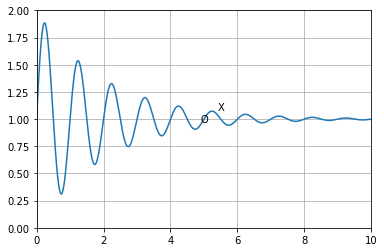

In [401]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(0, 2)
ax.text(*ax.transAxes.transform([0.5, 0.5]), "X", ha="center", va="center", transform=None)
ax.text(0.5, 0.5, "O", ha="center", va="center", transform=ax.transAxes)
ax.grid()

In [399]:
ax.transAxes.transform([0.5, 0.5])

array([221.4 , 144.72])

In [776]:
from matplotlib.axes import Axes
from matplotlib.projections import register_projection
import matplotlib.transforms as transforms
import matplotlib.axis as maxis
import matplotlib.spines as mspines

class DummyTransform(transforms.Transform):
    input_dims = 2
    output_dims = 2
    is_separable = False
    has_inverse = True

    def __init__(self):
        super(DummyTransform, self).__init__()

    def transform_non_affine(self, array):
        return array

    def inverted(self):
        return DummyTransform()

    
class MyTransform(transforms.Transform):
    input_dims = 2
    output_dims = 2
    is_separable = False
    has_inverse = True

    def __init__(self, ax):
        super(MyTransform, self).__init__()
        forward = ax.transScale + ax.transLimits
        self._ax = ax

    def transform_non_affine(self, array):
        forward = self._ax.transScale + self._ax.transLimits
        x0, y0 = forward.transform([ax.X0, ax.Y0])
        out = np.zeros_like(array)
        out[:, 0] = array[:, 0] + (array[:, 0] - x0) * (array[:, 1] / y0)
        out[:, 1] = array[:, 1]
        return out

    def inverted(self):
        return MyInvertedTransform(self._ax)


class MyInvertedTransform(transforms.Transform):
    input_dims = 2
    output_dims = 2
    is_separable = False
    has_inverse = True

    def __init__(self, ax):
        super(MyInvertedTransform, self).__init__()
        self._ax = ax

    def transform_non_affine(self, array):
        forward = self._ax.transScale + self._ax.transLimits
        x0, y0 = forward.transform([ax.X0, ax.Y0])
        out = np.zeros_like(array)
        x = array[:, 0]
        y = array[:, 1]
        out[:, 0] = (x + (x0 / y0) * y) / (1 + y / y0)
        out[:, 1] = y
        return out

    def inverted(self):
        return MyTransform(self._ax)
    
# The sole purpose of this class is to look at the upper, lower, or total
# interval as appropriate and see what parts of the tick to draw, if any.
class MyXTick(maxis.XTick):
#     def update_position(self, loc):
#         # This ensures that the new value of the location is set before
#         # any other updates take place
#         self._loc = loc
#         super().update_position(loc)

#     def _has_default_loc(self):
#         return self.get_loc() is None

#     def _need_lower(self):
#         return (self._has_default_loc() or
#                 transforms.interval_contains(self.axes.lower_xlim,
#                                              self.get_loc()))

#     def _need_upper(self):
#         return (self._has_default_loc() or
#                 transforms.interval_contains(self.axes.upper_xlim,
#                                              self.get_loc()))

#     @property
#     def gridOn(self):
#         return (self._gridOn and (self._has_default_loc() or
#                 transforms.interval_contains(self.get_view_interval(),
#                                              self.get_loc())))

#     @gridOn.setter
#     def gridOn(self, value):
#         self._gridOn = value

#     @property
#     def tick1On(self):
#         return self._tick1On and self._need_lower()

#     @tick1On.setter
#     def tick1On(self, value):
#         self._tick1On = value

#     @property
#     def label1On(self):
#         return self._label1On and self._need_lower()

#     @label1On.setter
#     def label1On(self, value):
#         self._label1On = value

#     @property
#     def tick2On(self):
#         return self._tick2On and self._need_upper()

#     @tick2On.setter
#     def tick2On(self, value):
#         self._tick2On = value

#     @property
#     def label2On(self):
#         return self._label2On and self._need_upper()

#     @label2On.setter
#     def label2On(self, value):
#         self._label2On = value

    def get_view_interval(self):
        return self.axes.viewLim.intervalx
        #return self.axes.xaxis.get_view_interval()


# This class exists to provide two separate sets of intervals to the tick,
# as well as create instances of the custom tick
class MyXAxis(maxis.XAxis):
    def _get_tick(self, major):
        return MyXTick(self.axes, None, '', major=major)

    def get_view_interval(self):
        return self.axes.viewLim.intervalx


# This class exists to calculate the separate data range of the
# upper X-axis and draw the spine there. It also provides this range
# to the X-axis artist for ticking and gridlines
class MySpine(mspines.Spine):
    def _adjust_location(self):
        pts = self._path.vertices
        if self.spine_type == 'top':
            pts[:,:] = self.axes.upper_lim
            pts[:,1] = 1.
        else:
            pts[:,:] = self.axes.lower_lim
            pts[:,1] = 0.
    
def MyAxesFactory(x0, y0):
    MyAxes.X0 = x0
    MyAxes.Y0 = y0
    return MyAxes

class MyAxes(Axes):
    name = "myaxes"
    X0 = 25.0
    Y0 = 2.0        
    
    def _init_axis(self):
        # Taken from Axes and modified to use our modified X-axis
        self.xaxis = MyXAxis(self)
        self.spines['top'].register_axis(self.xaxis)
        self.spines['bottom'].register_axis(self.xaxis)
        self.yaxis = maxis.YAxis(self)
        self.spines['left'].register_axis(self.yaxis)
        self.spines['right'].register_axis(self.yaxis)
        
    def _gen_axes_spines(self):
        spines = {'top': MySpine.linear_spine(self, 'top'),
                  'bottom': mspines.Spine.linear_spine(self, 'bottom'),
                  'left': mspines.Spine.linear_spine(self, 'left'),
                  'right': mspines.Spine.linear_spine(self, 'right')}
        return spines
    
    def _set_lim_and_transforms(self):
        super(MyAxes, self)._set_lim_and_transforms()
        #MyTransform applies custom transformation in data coordinates
        #transScale applyes scaling (by default linear)
        #transLimits applies xlim and ylim
        self.transSkew = MyTransform(self)
        self.transDataToAxes = self.transScale + self.transLimits + self.transSkew
        #self.transDataToAxes = self.transScale + self.transLimits
        #self.transDataToAxes = self.transLimits
        #overall transformation from data to display
        self.transData = self.transDataToAxes + self.transAxes
        
        # Blended transforms like this need to have the skewing applied using
        # both axes, in axes coords like before.
        #x axis transform receives x in data coordinates and y in axis coordinates
#         self._xaxis_transform = (
#             #keep x in data coordinates and convert y back into data coordinates
#             transforms.blended_transform_factory(transforms.IdentityTransform(), self.transDataToAxes.inverted()) +
#             #now x and y are in data coordinates, we need to apply transformation to axis coordinates
#             self.transDataToAxes +
#             #finally convert to display coordinates
#             self.transAxes 
#         )
        self._xaxis_transform = (
            transforms.blended_transform_factory(self.transScale + self.transLimits, transforms.IdentityTransform()) +
            self.transSkew +
            self.transAxes
        )
        
    @property
    def lower_xlim(self):
        return self.lower_lim[:, 0]
        #return self.axes.viewLim.intervalx

    @property
    def upper_xlim(self):
        return self.upper_lim[:, 0]
    
    @property
    def upper_lim(self):
        pts = [[0., 1.], [1., 1.]]
        return self.transDataToAxes.inverted().transform(pts)
    
    @property
    def lower_lim(self):
        pts = [[0., 0.], [1., 0.]]
        return self.transDataToAxes.inverted().transform(pts)
    
    @staticmethod
    def _as_mpl_axes():
        return MyAxes, { }
    
#     def set_xlim(self, *args, **kwargs):
#         print("set_xlim", self.transLimits.transform([5., 2.]))
#         super(MyAxes, self).set_xlim(*args, **kwargs)
#         print("set_xlim", self.transLimits.transform([5., 2.]))
#         self._set_lim_and_transforms()
        
              
register_projection(MyAxes)

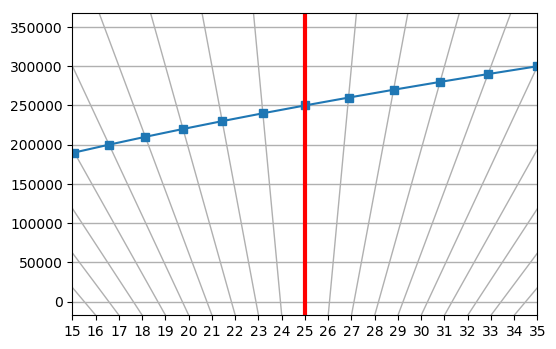

In [785]:
fig = plt.figure()
#fig.set_size_inches(12, 8)
fig.set_dpi(100)
ax = fig.add_subplot(111, projection=MyAxesFactory(25.0, 300000.0))
# ax = fig.add_subplot(111)
x = np.arange(15, 36, 1)
#y = np.sin(2*np.pi*x) + 1.
y = 10000 * x
ax.plot(x, y, marker="s")
# for i in range(0, 10):
#     ax.plot([i]*3, [0., 1., 2.], "k", linewidth=1.0)
ax.plot([25., 25., 25.], [0., 5., 10.], "g", linewidth=3.0) 
ax.axvline(25., color="r", linewidth=3.0)
ax.set_xlim(15, 35)
#ax.set_ylim(0, 2)
ax.get_xaxis().set_ticks(x)
#ax.get_yaxis().set_ticks(np.arange(0., 2.1, 0.1))
ax.grid(True, axis="y", linewidth=1.0)
ax.grid(True, axis="x", linewidth=1.0)
fig.savefig("save.png")

In [707]:
ax._xaxis_transform.transform([5., 1.])

array([ 615., 3271.])

In [704]:
print(ax.transLimits.transform([5., 2.]))

[0.5 1. ]


In [705]:
t1 = (DummyTransform() +
      transforms.blended_transform_factory(transforms.IdentityTransform(), ax.transDataToAxes.inverted()) + 
      ax.transDataToAxes)
print(t1.transform([5, 1.]))

[0.5 1. ]


In [666]:
ax.transAxes.transform([0.5, 1.])

array([615., 704.])

In [604]:
ax.transDataToAxes.transform([5, 1])

array([0.5, 0.5])

In [580]:
ax.lower_xlim

array([ 0., 10.])

In [581]:
ax.upper_xlim

array([4., 6.])

In [582]:
t1 = transforms.blended_transform_factory(transforms.IdentityTransform(), ax.transDataToAxes.inverted())
print(t1.transform([2.5, 1.]))
t2 = t1 + ax.transDataToAxes
print(t2.transform([4.0, 0.75]))
t3 = t2 + ax.transAxes
print(t3.transform([4.0, 0.75]))

[2.5 2. ]
[0.1  0.75]
[243. 553.]


In [ ]:
self.axes.xaxis.get_view_interval()

In [384]:
ax._xaxis_transform.transform([5., 1.])

array([442.8 , 289.44])

In [390]:
ax.transAxes.transform([0.5, 0.5])

array([442.8 , 289.44])

In [409]:
ax.transDataToAxes.inverted().transform([0.5, 1])

array([5., 2.])

In [290]:
ax.transData.transform([[5., 0.], [6., 0.], [6., 1.], [5., 1.]])

array([[442.8 ,  72.  ],
       [509.76,  72.  ],
       [576.72, 289.44],
       [442.8 , 289.44]])

In [291]:
ax.get_xaxis_transform().transform([[5., 0.], [6., 0.], [6., 1.], [5., 1.]])

array([[442.8 ,  72.  ],
       [509.76,  72.  ],
       [576.72, 289.44],
       [442.8 , 289.44]])

In [292]:
442.8-375.84

66.96000000000004

In [293]:
375.84-308.88

66.95999999999998

In [294]:
t1 = transforms.Affine2D().translate(tx=1, ty=0)
t2 = transforms.Affine2D().rotate_deg(90)

In [295]:
t = t1 + t2

In [296]:
t.transform([[0., 0.], [0., 1]])

array([[ 6.123234e-17,  1.000000e+00],
       [-1.000000e+00,  1.000000e+00]])

In [297]:
transforms.blended_transform_factory?

In [300]:
ax.get_xaxis().get_view_interval()

array([ 0., 10.])

In [238]:
t1 = MyTransform(5., 5.)
a = t1.transform([[4., 0.], [6., 0.], [6., 1.], [4., 1.], [6., 2.], [4., 2.]])

In [239]:
t2 = t1.inverted()
t2.transform(a)

array([[4., 0.],
       [6., 0.],
       [6., 1.],
       [4., 1.],
       [6., 2.],
       [4., 2.]])

In [240]:
ax._xaxis_transform.transform([])

In [265]:
ax.transDataToAxes.transform([5., 2.])

array([0.5, 1. ])

In [273]:
t3 = transforms.blended_transform_factory(transforms.IdentityTransform(), ax.transDataToAxes.inverted())

In [277]:
t3.transform([6., 1.])

array([6., 2.])